In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import metrics 

In [3]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


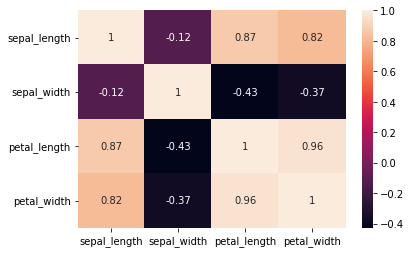

In [8]:
sns.heatmap(data.corr(), annot = True)

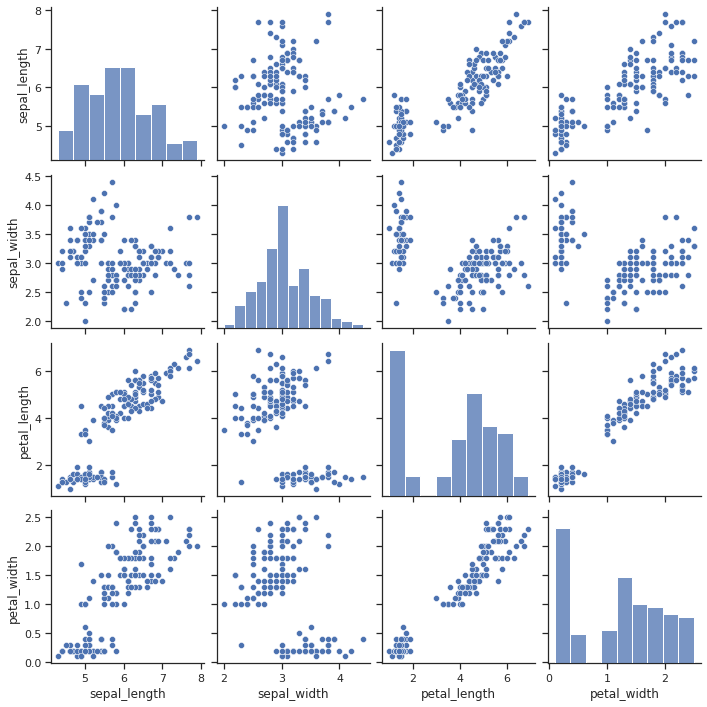

In [9]:
sns.set(style="ticks")
sns.pairplot(data=data)

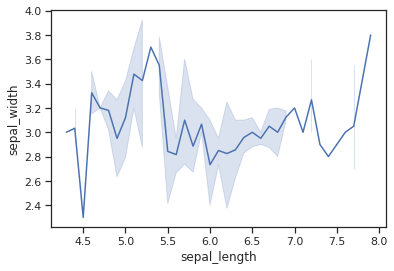

In [10]:
sns.lineplot(data=data, x = 'sepal_length', y = 'sepal_width')

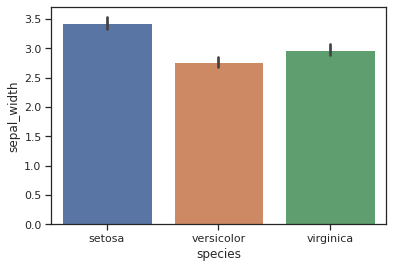

In [11]:
sns.set(style="ticks")
sns.barplot(data=data, y = 'sepal_width', x = 'species')

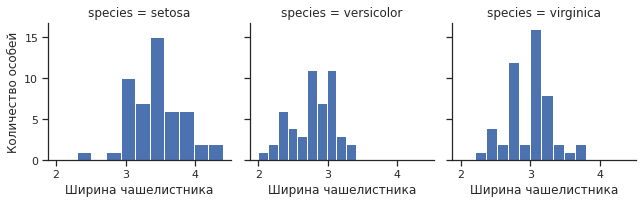

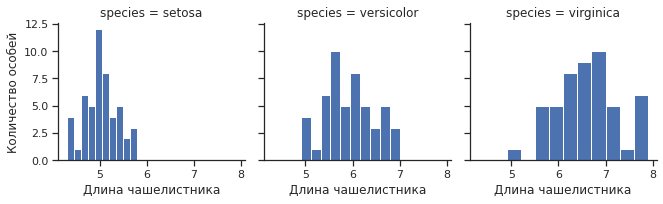

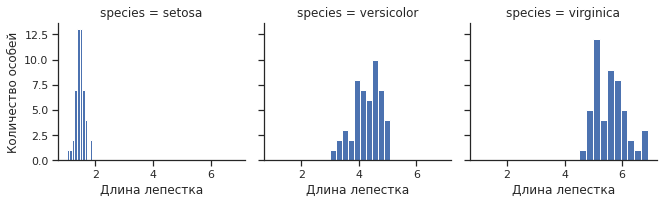

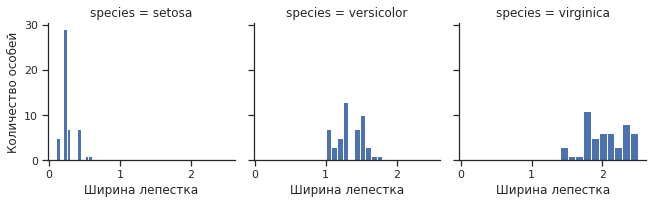

In [12]:
g1 = sns.FacetGrid(data=data, col='species')
g1.map(plt.hist, 'sepal_width');
g1.set_axis_labels('Ширина чашелистника',
                  'Количество особей');

g2 = sns.FacetGrid(data=data, col='species')
g2.map(plt.hist, 'sepal_length');
g2.set_axis_labels('Длина чашелистника',
                  'Количество особей');

g3 = sns.FacetGrid(data=data, col='species')
g3.map(plt.hist, 'petal_length');
g3.set_axis_labels('Длина лепестка',
                  'Количество особей');

g4 = sns.FacetGrid(data=data, col='species')
g4.map(plt.hist, 'petal_width');
g4.set_axis_labels('Ширина лепестка',
                  'Количество особей');


In [13]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


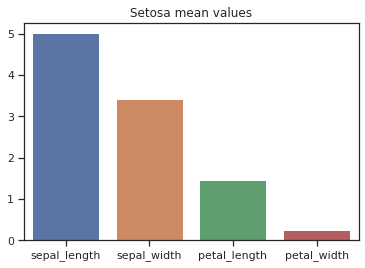

In [14]:
barplot = sns.barplot(data=data.groupby('species').mean().iloc[0:1])
barplot.axes.set_title('Setosa mean values');

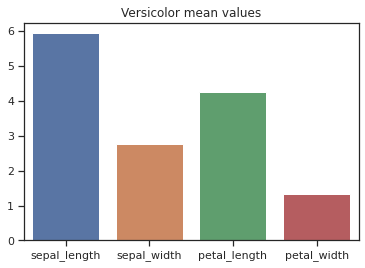

In [15]:
barplot = sns.barplot(data=data.groupby('species').mean().iloc[1:2])
barplot.axes.set_title('Versicolor mean values');

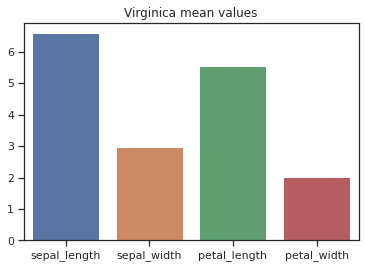

In [16]:
barplot = sns.barplot(data=data.groupby('species').mean().iloc[2:3])
barplot.axes.set_title('Virginica mean values');

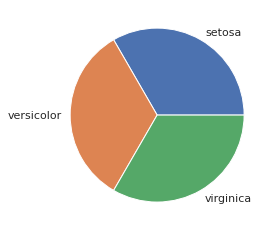

In [17]:
plt.pie(data['species'].value_counts(), labels = data['species'].unique());

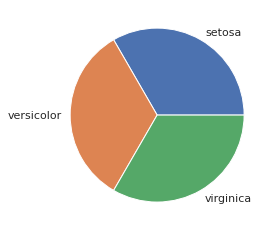

In [18]:
plt.pie(data['species'].value_counts(), labels = data['species'].unique());

In [19]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=48531e41b1bbd90ed5f52d54a89fe5d45e2dad78e24720f11666f3d65da66746
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_data, test_data, train_labels, test_labels = train_test_split(data[['sepal_length','sepal_width','petal_length','petal_width']], data['species'], test_size = 0.2, random_state = 0)
print(train_data)

     sepal_length  sepal_width  petal_length  petal_width
137           6.4          3.1           5.5          1.8
84            5.4          3.0           4.5          1.5
27            5.2          3.5           1.5          0.2
127           6.1          3.0           4.9          1.8
132           6.4          2.8           5.6          2.2
..            ...          ...           ...          ...
9             4.9          3.1           1.5          0.1
103           6.3          2.9           5.6          1.8
67            5.8          2.7           4.1          1.0
117           7.7          3.8           6.7          2.2
47            4.6          3.2           1.4          0.2

[120 rows x 4 columns]


In [22]:
test_data

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [23]:
train_labels

137     virginica
84     versicolor
27         setosa
127     virginica
132     virginica
          ...    
9          setosa
103     virginica
67     versicolor
117     virginica
47         setosa
Name: species, Length: 120, dtype: object

In [24]:
model = linear_model.SGDClassifier(alpha=0.001, random_state = 52)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
metrics.accuracy_score(test_labels, model_predictions)

0.9

In [25]:
print(metrics.classification_report(test_labels, model_predictions));

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.50      0.67         6

    accuracy                           0.90        30
   macro avg       0.94      0.83      0.85        30
weighted avg       0.92      0.90      0.89        30



In [29]:
model_predictions, test_labels

(array(['virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
        'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'versicolor', 'versicolor', 'versicolor',
        'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
        'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
        'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
        'setosa'], dtype='<U10'), 114     virginica
 62     versicolor
 33         setosa
 107     virginica
 7          setosa
 100     virginica
 40         setosa
 86     versicolor
 76     versicolor
 71     versicolor
 134     virginica
 51     versicolor
 73     versicolor
 54     versicolor
 63     versicolor
 37         setosa
 78     versicolor
 90     versicolor
 45         setosa
 16         setosa
 121     virginica
 66     versicolor
 24         setosa
 8          setosa
 126     virginica
 22         setosa
 44         setosa
 97     versicolor
 93     versicolor
 26  